# Raman's notebooks

the idea is to have a notebook for each member
<member_name>_notebooks.ipynb of the team, where they can write their ideas and tests.
And then we can merge them into the main notebook.

# Dumb test of artchitecture of birds sound classification

## general imports

In [3]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import os


## simple load of sound

/var/folders/59/__mg86nn4hx9y9ck3zxxr7680000gn/T/ipykernel_35949/2375732743.py:24: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  signal_db = librosa.amplitude_to_db(signal_stft)


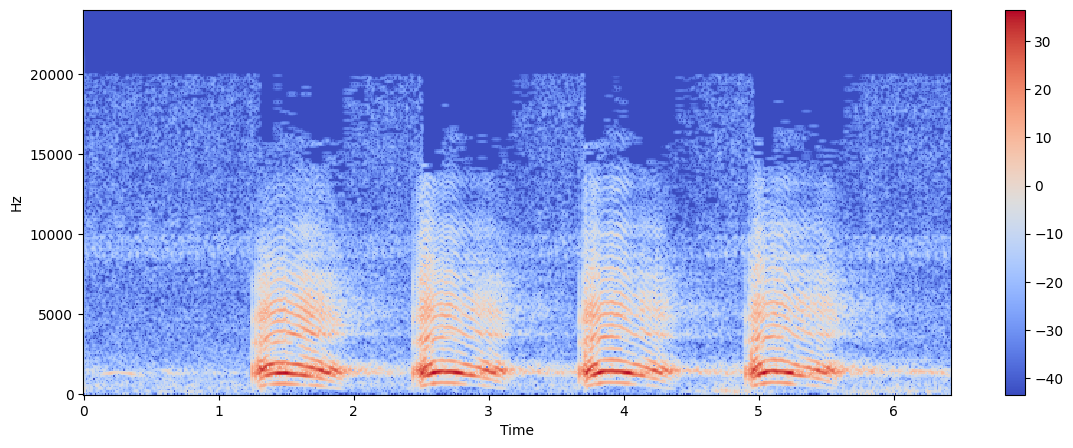

In [6]:
SOUND_DIR = '../raw_data/train_audio/'
SOUND_DIR_FILE= os.path.join(SOUND_DIR,'amecro/XC126022.mp3')
SAMPLING_RATE = 48000
DURATION_IN_SECONDS = 5
READING_OFFSET = 0
STFT_NUMBER_SAMPLES = 512


# Load the mp3 file
#def load_sound_file():

signal,simpling_rate = librosa.load(SOUND_DIR_FILE,
                                     offset = READING_OFFSET,
                                     duration=DURATION_IN_SECONDS,
                                     sr=SAMPLING_RATE,
                                     mono=True) # sr = sampling rate


signal_stft = librosa.stft(signal,
                           n_fft=STFT_NUMBER_SAMPLES)



signal_db = librosa.amplitude_to_db(signal_stft)

plt.figure(figsize=(14, 5))
librosa.display.specshow(signal_db, sr=SAMPLING_RATE, x_axis='time', y_axis='hz')
plt.colorbar()


/Users/ramansheshka/.pyenv/versions/3.10.6/envs/birdsong/lib/python3.10/site-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
/var/folders/59/__mg86nn4hx9y9ck3zxxr7680000gn/T/ipykernel_35949/4155515637.py:20: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(S, fmin=F_MIN,y_axis='linear')


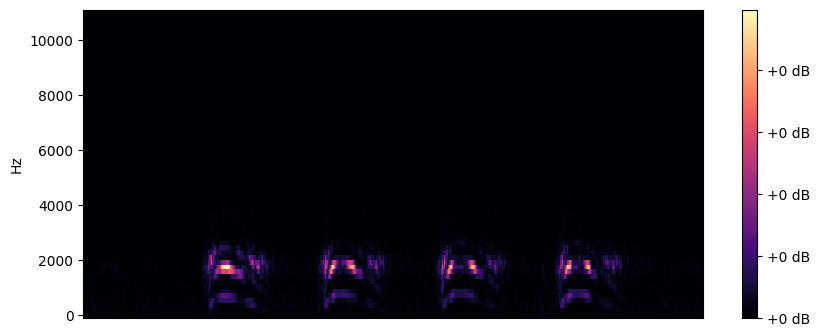

In [7]:
# Plot mel-spectrogram
HOP_SIZE = 20000
N_MELS = 64
WINDOW_TYPE = 'hann'
FEATURE = 'mel'
F_MIN = 250
F_MAX = 83000

S = librosa.feature.melspectrogram(S=signal_stft,
                                   power=1,
                                   sr=SAMPLING_RATE,
                                   n_fft=STFT_NUMBER_SAMPLES,
                                   n_mels=N_MELS,
                                   htk=True,
                                   window = WINDOW_TYPE,
                                   fmin=F_MIN,
                                   fmax=F_MAX)

plt.figure(figsize=(10, 4))
librosa.display.specshow(S, fmin=F_MIN,y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.show()


In [8]:
type(S)


numpy.ndarray

In [9]:
from tensorflow.keras.utils import to_categorical
import numpy as np
from PIL import Image


In [10]:
def get_folders_labels(path:str)->list:
    """
    Get the list of folders in a given path, except the ones starting with a dot '.'
    """
    folders_labels = os.listdir(path)
    return [label for label in folders_labels if not label.startswith(".")]

def get_classes_labels_dict(folders_labels:list)->dict:
    """
    Get the dictionary of classes labels from a list of folders labels
    """
    return {label: i for i, label in enumerate(folders_labels)}
folders_labels = get_folders_labels('../raw_data/train_sample_audio/')
classes_labels_numeric = list(get_classes_labels_dict(folders_labels).values())
classes_labels_numeric_clean = list(set(classes_labels_numeric))
y = to_categorical(classes_labels_numeric_clean ,len(classes_labels_numeric_clean))


In [12]:
classes_labels_numeric_clean


[0, 1, 2, 3]

/var/folders/59/__mg86nn4hx9y9ck3zxxr7680000gn/T/ipykernel_35949/2262313465.py:20: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  augmented_sound_db = librosa.amplitude_to_db(augmented_sound_stft)


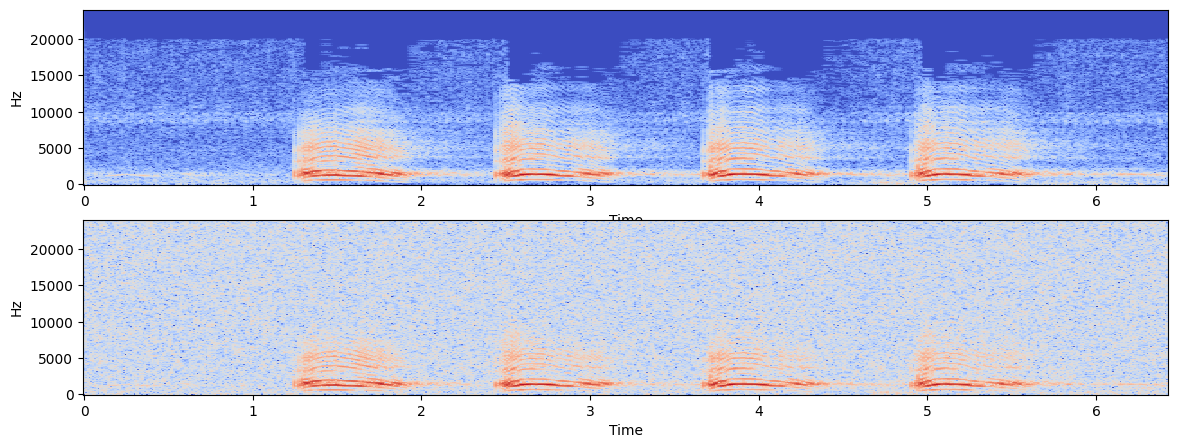

In [16]:
import pydub
from audiomentations import PitchShift, Shift,AddGaussianSNR, Compose

MIN_SNR_DB = 5.0
MAX_SNR_DB = 40.0
PROBABILITY_SNR = 1.0

transform = AddGaussianSNR(
    min_snr_db=MIN_SNR_DB,
    max_snr_db=MAX_SNR_DB,
    p=PROBABILITY_SNR
)

augmented_sound = transform(signal, sample_rate=SAMPLING_RATE)

fig, ax = plt.subplots(nrows=2,ncols=1, figsize=(14, 5))
augmented_sound_stft = librosa.stft(augmented_sound,
                                    n_fft=STFT_NUMBER_SAMPLES)

augmented_sound_db = librosa.amplitude_to_db(augmented_sound_stft)
librosa.display.specshow(signal_db, sr=SAMPLING_RATE, x_axis='time', y_axis='hz', ax=ax[0])
librosa.display.specshow(augmented_sound_db, sr=SAMPLING_RATE, x_axis='time', y_axis='hz', ax=ax[1])



In [24]:
augment = Compose([
    PitchShift(min_semitones=-4, max_semitones=4, p=0.5),
    Shift(min_shift=-0.01, max_shift=0.01, shift_unit='seconds', p=1),
])

In [25]:
augment_sound = augment(signal, sample_rate=SAMPLING_RATE)

/var/folders/59/__mg86nn4hx9y9ck3zxxr7680000gn/T/ipykernel_35949/3589524127.py:5: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  augment_sound_db = librosa.amplitude_to_db(augment_sound_stft)


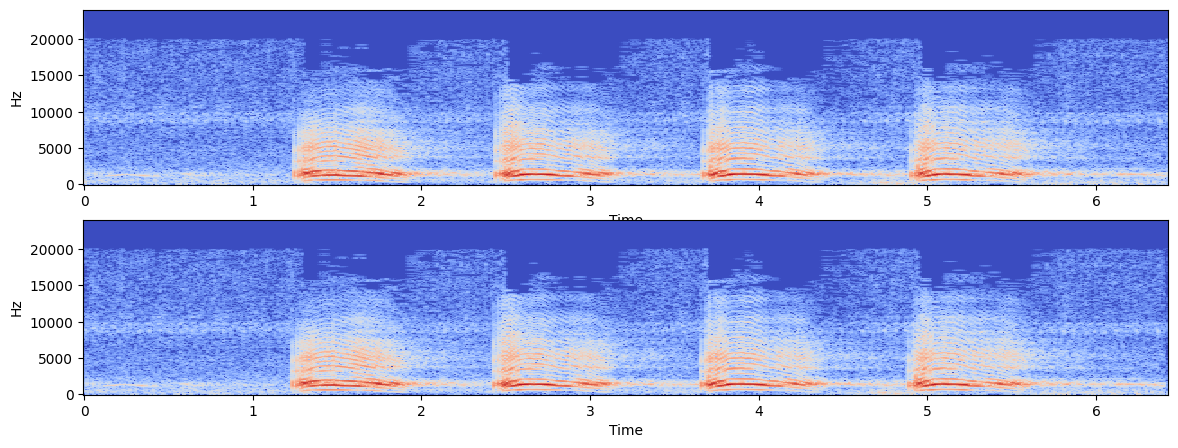

In [26]:
fig, ax = plt.subplots(nrows=2,ncols=1, figsize=(14, 5))
augment_sound_stft = librosa.stft(augment_sound,
                                    n_fft=STFT_NUMBER_SAMPLES)

augment_sound_db = librosa.amplitude_to_db(augment_sound_stft)
librosa.display.specshow(signal_db, sr=SAMPLING_RATE, x_axis='time', y_axis='hz', ax=ax[0])
librosa.display.specshow(augment_sound_db, sr=SAMPLING_RATE, x_axis='time', y_axis='hz', ax=ax[1])

